In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Step 2: Create Hunter S Thompson dataset

books = {
    "Book": [
        "Hell's Angels",
        "Fear and Loathing in Las Vegas",
        "Fear and Loathing on Campaign Trail '72",
        "The Great Shark Hunt",
        "The Rum Diary"
    ],
    
    "Average_Price_GBP": [
        10.99,
        9.99,
        12.99,
        14.99,
        8.99
    ],
    
    "Popularity_Score": [
        80,
        100,
        85,
        75,
        70
    ]
}

df_books = pd.DataFrame(books)

df_books


,Book,Average_Price_GBP,Popularity_Score
0,Hell's Angels,10.99,80
1,Fear and Loathing in Las Vegas,9.99,100
2,Fear and Loathing on Campaign Trail '72,12.99,85
3,The Great Shark Hunt,14.99,75
4,The Rum Diary,8.99,70


In [3]:
# Step 3: Bookstore company dataset

companies = {
    "Company": ["Waterstones", "WHSmith"],
    
    "Stores_in_England": [280, 500],
    
    "Customer_Type": [
        "Serious Readers, Students, Professionals",
        "Travelers, Casual Readers"
    ],
    
    "Average_Customers_Per_Store_Per_Week": [
        1200,
        800
    ],
    
    "Conversion_Rate": [
        0.08,   # 8% buy Hunter S Thompson
        0.04    # 4%
    ]
}

df_companies = pd.DataFrame(companies)

df_companies


,Company,Stores_in_England,Customer_Type,Average_Customers_Per_Store_Per_Week,Conversion_Rate
0,Waterstones,280,"Serious Readers, Students, Professionals",1200,0.08
1,WHSmith,500,"Travelers, Casual Readers",800,0.04


In [4]:
# Step 4: Calculate weekly Hunter S Thompson book sales

df_companies["Weekly_Book_Sales"] = (
    df_companies["Stores_in_England"] *
    df_companies["Average_Customers_Per_Store_Per_Week"] *
    df_companies["Conversion_Rate"]
)

df_companies


,Company,Stores_in_England,Customer_Type,Average_Customers_Per_Store_Per_Week,Conversion_Rate,Weekly_Book_Sales
0,Waterstones,280,"Serious Readers, Students, Professionals",1200,0.08,26880.0
1,WHSmith,500,"Travelers, Casual Readers",800,0.04,16000.0


In [6]:
# Step 5: Calculate weekly revenue

# Define the average book price (example value in GBP)
average_price = 12.99

# Calculate weekly revenue
df_companies["Weekly_Revenue_GBP"] = (
    df_companies["Weekly_Book_Sales"] * average_price
)

# Display the dataframe
df_companies


,Company,Stores_in_England,Customer_Type,Average_Customers_Per_Store_Per_Week,Conversion_Rate,Weekly_Book_Sales,Weekly_Revenue_GBP
0,Waterstones,280,"Serious Readers, Students, Professionals",1200,0.08,26880.0,349171.2
1,WHSmith,500,"Travelers, Casual Readers",800,0.04,16000.0,207840.0


In [7]:
# Step 6: Yearly revenue

df_companies["Yearly_Revenue_GBP"] = (
    df_companies["Weekly_Revenue_GBP"] * 52
)

df_companies


,Company,Stores_in_England,Customer_Type,Average_Customers_Per_Store_Per_Week,Conversion_Rate,Weekly_Book_Sales,Weekly_Revenue_GBP,Yearly_Revenue_GBP
0,Waterstones,280,"Serious Readers, Students, Professionals",1200,0.08,26880.0,349171.2,18156902.4
1,WHSmith,500,"Travelers, Casual Readers",800,0.04,16000.0,207840.0,10807680.0


In [8]:
demographics = {
    
    "Age_Group": [
        "18-24",
        "25-34",
        "35-44",
        "45-54",
        "55+"
    ],
    
    "Waterstones_Percent": [
        20,
        35,
        20,
        15,
        10
    ],
    
    "WHSmith_Percent": [
        30,
        30,
        20,
        10,
        10
    ]
}

df_demo = pd.DataFrame(demographics)

df_demo


,Age_Group,Waterstones_Percent,WHSmith_Percent
0,18-24,20,30
1,25-34,35,30
2,35-44,20,20
3,45-54,15,10
4,55+,10,10


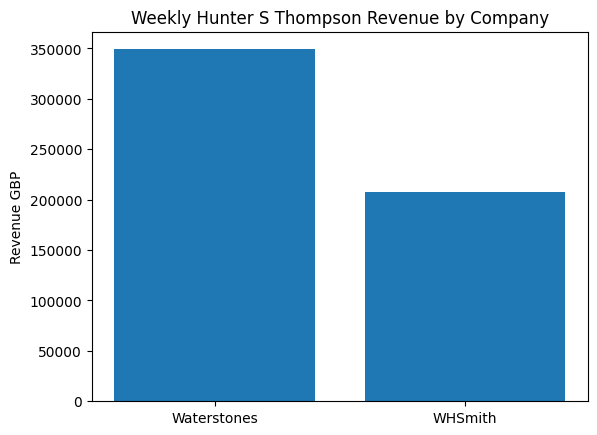

In [9]:
# Step 8: Visualization

plt.bar(
    df_companies["Company"],
    df_companies["Weekly_Revenue_GBP"]
)

plt.title("Weekly Hunter S Thompson Revenue by Company")
plt.ylabel("Revenue GBP")
plt.show()


In [10]:
profit_margin = {
    "Waterstones": 0.35,
    "WHSmith": 0.25
}

df_companies["Profit_Margin"] = df_companies["Company"].map(profit_margin)

df_companies["Weekly_Profit"] = (
    df_companies["Weekly_Revenue_GBP"] *
    df_companies["Profit_Margin"]
)

df_companies["Yearly_Profit"] = (
    df_companies["Weekly_Profit"] * 52
)

df_companies


,Company,Stores_in_England,Customer_Type,Average_Customers_Per_Store_Per_Week,Conversion_Rate,Weekly_Book_Sales,Weekly_Revenue_GBP,Yearly_Revenue_GBP,Profit_Margin,Weekly_Profit,Yearly_Profit
0,Waterstones,280,"Serious Readers, Students, Professionals",1200,0.08,26880.0,349171.2,18156902.4,0.35,122209.92,6354915.84
1,WHSmith,500,"Travelers, Casual Readers",800,0.04,16000.0,207840.0,10807680.0,0.25,51960.00,2701920.00


In [11]:
print("Company Comparison Summary")

for index, row in df_companies.iterrows():
    
    print("\nCompany:", row["Company"])
    
    print("Weekly Revenue:", row["Weekly_Revenue_GBP"])
    
    print("Yearly Revenue:", row["Yearly_Revenue_GBP"])
    
    print("Yearly Profit:", row["Yearly_Profit"])


Company Comparison Summary

Company: Waterstones
Weekly Revenue: 349171.2
Yearly Revenue: 18156902.400000002
Yearly Profit: 6354915.84

Company: WHSmith
Weekly Revenue: 207840.0
Yearly Revenue: 10807680.0
Yearly Profit: 2701920.0


In [12]:
df_companies.to_csv("hunter_s_thompson_bookstore_dataset.csv", index=False)


In [13]:
# simulate 52 weeks

weeks = np.arange(1, 53)

simulation = []

for week in weeks:
    
    for index, row in df_companies.iterrows():
        
        sales = row["Weekly_Book_Sales"] * np.random.uniform(0.8, 1.2)
        
        simulation.append([
            week,
            row["Company"],
            sales
        ])

df_sim = pd.DataFrame(simulation, columns=["Week", "Company", "Sales"])

df_sim.head()


,Week,Company,Sales
0,1,Waterstones,29544.502828
1,1,WHSmith,13542.733429
2,2,Waterstones,31610.266898
3,2,WHSmith,18275.999146
4,3,Waterstones,22948.804400
